# Task 5. Algorithms on graphs. Introduction to graphs and basic algorithms on graph
### Sarafanov Michail, Big Data and Machine Learning, C4134

In [115]:
# Download all the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import math
import pandas as pd
import random
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 2000
Average degree:  40.0000


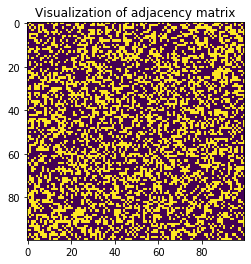

In [116]:
def generate_graph(nnodes, nedges):
    shape = (nnodes,nnodes)
    G = nx.gnm_random_graph(n=nnodes, m=nedges, directed = False)
    matrix = nx.adjacency_matrix(G)
    print(nx.info(G))
    
    matrix = matrix.toarray()
    
    return(matrix, G)

G_adj_matrix, G = generate_graph(nnodes = 100, nedges = 2000)
plt.imshow(G_adj_matrix)
plt.title('Visualization of adjacency matrix')
plt.show()

The graph shows that the matrix turned out to be symmetric and contains only zeros and ones.

## Adjacency matrix

In [117]:
G_adj_dataframe = pd.DataFrame(G_adj_matrix)
print(G_adj_dataframe[[0,1,2,3,4,5,6,7,8,9]].head(10))

   0  1  2  3  4  5  6  7  8  9
0  0  1  0  0  0  0  0  0  0  1
1  1  0  1  0  0  1  1  1  0  0
2  0  1  0  1  0  1  0  1  0  0
3  0  0  1  0  0  1  0  1  1  0
4  0  0  0  0  0  1  1  0  1  1
5  0  1  1  1  1  0  0  0  0  1
6  0  1  0  0  1  0  0  0  1  0
7  0  1  1  1  0  0  0  0  0  0
8  0  0  0  1  1  0  1  0  0  1
9  1  0  0  0  1  1  0  0  1  0


## Adjacency list

In [118]:
# Print the first 9 lines
string = 0
for line in nx.generate_adjlist(G, delimiter = ' '):
    print(line[0], ' -', line[1:], '\n')
    string += 1
    if string == 10:
        break

0  -  73 64 62 48 80 40 26 22 23 1 13 95 60 87 46 76 37 52 86 88 79 16 11 91 9 54 34 98 32 45 30 36 15 77 

1  -  85 35 42 30 81 6 45 39 70 22 23 5 56 18 44 7 65 13 57 33 89 82 25 71 48 72 2 64 52 97 78 58 53 29 59 87 95 86 34 32 79 93 12 19 50 74 

2  -  3 42 98 83 25 93 81 68 47 92 80 12 23 71 56 84 66 78 91 82 79 72 39 7 21 67 5 36 24 45 48 44 16 73 63 53 77 46 88 

3  -  32 64 5 40 77 65 20 37 94 74 13 38 85 8 44 95 86 29 76 50 84 83 36 93 33 82 62 55 99 28 30 18 75 67 24 91 56 97 42 7 

4  -  24 54 78 70 19 84 30 13 85 45 93 12 5 37 6 65 75 41 8 34 92 90 81 55 98 89 36 94 58 97 53 82 88 48 11 9 99 64 29 95 77 42 32 15 23 

5  -  52 58 45 72 85 75 47 57 73 49 93 32 46 88 96 44 61 25 94 71 30 28 83 95 12 36 9 81 41 99 14 63 74 29 33 

6  -  21 17 60 19 37 26 41 28 73 76 50 97 38 86 55 70 56 62 96 44 77 88 57 84 22 8 72 58 54 69 63 16 91 90 

7  -  30 44 28 68 63 96 76 23 26 95 61 45 12 93 58 49 57 33 85 54 82 29 81 16 34 98 78 38 88 89 97 53 67 62 55 51 27 66 24 10 

8  -  18 89 37 

It is worth noting that if the number of edges of the graph is small compared to the number of vertices, then the values of most elements of the adjacency matrix will be 0. Therefore, there is an alternative entry - the adjacency list. Storing graph data in this way allows you to quickly sort through the neighbors of the vertex, as well as save memory.

In this case (a graph consisting of 100 vertices and 2,000 edges), I believe that it is preferable to use the adjacency matrix.

## Graph visualization

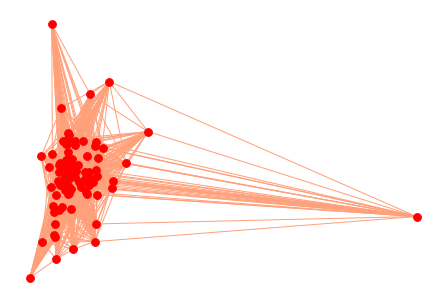

In [119]:
nx.draw(G, pos = nx.spectral_layout(G), node_color='red', node_size=60, edge_color='#FFA07A', with_labels=False)

## Depth-first search 

In [121]:
# Use the Depth-first search to find related graph components
components = 1 # Connectivity Components
vertices = np.arange(0,100) # Vertex list
Vert_list = np.array(list(nx.dfs_successors(G, source = 0))) # List of connected vertices with start at point 0

while True:
    # If there are vertices that are not connected to the rest, they are added to the "residuals"
    residuals = []
    for i in vertices:
        if np.argwhere(Vert_list == i) != None:
            # Such a vertex exists in the constructed trajectory
            pass
        else:
            # The count has not yet reached such a peak!
            residuals.append(i)

    # What remains of the last iteration
    vertices = residuals

    # If there are no vertices - finish
    if len(vertices) == 0:
        break
    # If there remains one "untouched" vertex - we finish
    elif len(vertices) == 1:
        components += 1
        break
    else:
        start_vertex = vertices[0]
        Vert_list = list(nx.dfs_successors(G, source = start_vertex))
        Vert_list = np.array(Vert_list)
        components += 1
        
print("Amount connected components of the graph -", components)

Amount connected components of the graph - 1


Thus, our graph has one connected component, since paths between all the vertices were found.

## Breadth-first search 

In [122]:
# Use a breadth-first search to find the shortest path between two vertices
start_vertices = [0,10]
stop_vertices = [44,55]
for start in start_vertices:
    for stop in stop_vertices:
        path = []
        Vert_list = list(nx.bfs_successors(G, source = start)) 
        print(Vert_list)
        for i in range(0, len(Vert_list)):
            path.append(Vert_list[i][0]) # Add the first i vertex to the path
            # Pass through all the neighbors for the vertex i
            for vertex in Vert_list[i][1]: 
                if stop == vertex:
                    # If the path consists of one vertex
                    if path == [Vert_list[i][0]]:
                        print('Vertex', start, 'and vertex', stop,'- are adjacent! \n')
                    else:
                        print('In order to get from vertex', start, 'to vertex', stop,
                              '-', len(path) - 1, 'intermediate vertices must be overcome!')
                        path.append(stop)
                        print('Path is -', path, '\n')
                    break

[(0, [73, 64, 62, 48, 80, 40, 26, 22, 23, 1, 13, 95, 60, 87, 46, 76, 37, 52, 86, 88, 79, 16, 11, 91, 9, 54, 34, 98, 32, 45, 30, 36, 15, 77]), (73, [63, 61, 5, 6, 67, 92, 70, 17, 50, 93, 59, 68, 35, 20, 18, 71, 33, 81, 74, 44, 66, 85, 2, 96]), (64, [3, 78, 14, 99, 29, 56, 31, 8, 83, 42, 57, 39, 41, 4, 24, 47]), (62, [82, 28, 12, 97, 53, 58, 84, 7, 25]), (48, [43, 89, 19, 90, 38, 72, 75]), (80, [10, 94, 65, 69]), (40, [49]), (26, [51, 27]), (23, [21]), (95, [55])]
In order to get from vertex 0 to vertex 44 - 1 intermediate vertices must be overcome!
Path is - [0, 73, 44] 

[(0, [73, 64, 62, 48, 80, 40, 26, 22, 23, 1, 13, 95, 60, 87, 46, 76, 37, 52, 86, 88, 79, 16, 11, 91, 9, 54, 34, 98, 32, 45, 30, 36, 15, 77]), (73, [63, 61, 5, 6, 67, 92, 70, 17, 50, 93, 59, 68, 35, 20, 18, 71, 33, 81, 74, 44, 66, 85, 2, 96]), (64, [3, 78, 14, 99, 29, 56, 31, 8, 83, 42, 57, 39, 41, 4, 24, 47]), (62, [82, 28, 12, 97, 53, 58, 84, 7, 25]), (48, [43, 89, 19, 90, 38, 72, 75]), (80, [10, 94, 65, 69]), (40, [4

To sum up, we used Depth-first search to find connected components of the graph and Breadth-first search to find a shortest path between two vertices. With the help of ready-made implementations of algorithms, such problems can be solved very quickly!